# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Para comenzar con los objetivos se denen cargar y explorar los archivos para identificar tipos de datos, valores faltantes, duplicados y posibles errores. Usar métodos como .head(), .info(), .describe(), y .isnull().sum(). Posteriormente a lo observado se deben limpiar los datos según lo observado, eliminando o corrigiendo errores, valores vacíos y duplicados, si es necesario.

In [1]:
# importar librerías
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 


In [ ]:
#PARA LA REVISION
orders = pd.read_csv("/datasets/instacart_orders.csv", sep=";")
products = pd.read_csv("/datasets/products.csv", sep=";")
order_products = pd.read_csv("/datasets/order_products.csv", sep=";")
aisles = pd.read_csv("/datasets/aisles.csv", sep=";")
departments = pd.read_csv("/datasets/departments.csv", sep=";")

In [3]:
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [4]:
products.info()
products.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [5]:
order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [6]:
order_products.describe()

,order_id,product_id,add_to_cart_order,reordered
count,4.545007e+06,4.545007e+06,4.544171e+06,4.545007e+06
mean,1.711166e+06,2.558084e+04,8.351669e+00,5.905025e-01
std,9.850955e+05,1.409552e+04,7.080368e+00,4.917411e-01
min,4.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,8.608170e+05,1.353500e+04,3.000000e+00,0.000000e+00
50%,1.711530e+06,2.527200e+04,6.000000e+00,1.000000e+00
75%,2.561311e+06,3.793500e+04,1.100000e+01,1.000000e+00
max,3.421079e+06,4.969400e+04,6.400000e+01,1.000000e+00


In [7]:
aisles.info()
aisles.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [8]:
departments.info()
departments.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


## Conclusiones

Los datos requieren de una limpieza, se requie solucionar problemas con el archivo, varios datos estan integrados en una comlumna lo cual impide su manupulacion, aunado al inadecuado reconocimiento de los datos (object) como consecuencia de lo anterior

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

Las bases de datos sucias deben ser limpiadas antes del análisis. Esto incluye identificar problemas como valores faltantes, duplicados e inconsistencias, y tomar decisiones sobre cómo corregirlos, ya sea eliminando duplicados, imputando valores faltantes o transformando datos incorrectos. La limpieza adecuada asegura que los análisis sean confiables y precisos.


## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [9]:
# Revisa si hay pedidos duplicados
print(orders.duplicated().sum())

15


In [10]:
duplicados = orders[orders.duplicated(keep=False)]
print(duplicados)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
30371    1918001   188546            14          3                  2   
99462     794638    50898            24          3                  2   
119251    408114    68324             4          3                  2   
142258   2845099    31189            11          3                  2   
145574    794638    50898            24          3                  2   
164581   1112182   202304            84          3                  2   
200059   1782114   106752             1          3                  2   
204042   2125197    14050            48          3                  2   
215294   2160484   107525            16          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
242618   1021560    53767             3          3                  2   
250626    467134    63189            21          3 

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

El dia de la semana en que se hizo el pedido (order_dow) y la hora en que se hizo el pedido.

In [11]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
pedidos_miercoles =orders[(orders['order_hour_of_day'] == 2) & (orders['order_dow'] == 3)]
print(pedidos_miercoles )

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

¿Qué sugiere este resultado?

El resultado anterior suguiere que 121 pedidos fueron realizados el dia miercoles a las 2:00 pm

In [12]:
# Elimina los pedidos duplicados
orders= orders.drop_duplicates()
orders= orders.reset_index(drop=True)

In [13]:
# Vuelve a verificar si hay filas duplicadas
print(orders.duplicated().sum())

0


In [14]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
print(orders["order_id" ].duplicated().sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos

Se eliminaron las filas con valores duplicados.

### `products` data frame

In [15]:
# Verifica si hay filas totalmente duplicadas
print(products.duplicated().sum())

0


In [16]:
# Revisa únicamente si hay ID de departamentos duplicados
print(products["department_id" ].duplicated().sum())

49673


In [17]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
products["product_name"].str.upper()

0                               CHOCOLATE SANDWICH COOKIES
1                                         ALL-SEASONS SALT
2                     ROBUST GOLDEN UNSWEETENED OOLONG TEA
3        SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...
4                                GREEN CHILE ANYTIME SAUCE
                               ...                        
49689                        HIGH PERFORMANCE ENERGY DRINK
49690                        ORIGINAL PANCAKE & WAFFLE MIX
49691      ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR
49692                               SPRING WATER BODY WASH
49693                              BURRITO- STEAK & CHEESE
Name: product_name, Length: 49694, dtype: object

In [18]:
print(products["product_name"].duplicated().sum())

1257


In [19]:
print(products["product_name"].nunique())

48436


In [20]:
# Revisa si hay nombres duplicados de productos no faltantes
products= products[~products["product_name"].isna()]
print(products)

       product_id                                       product_name  \
0               1                         Chocolate Sandwich Cookies   
1               2                                   All-Seasons Salt   
2               3               Robust Golden Unsweetened Oolong Tea   
3               4  Smart Ones Classic Favorites Mini Rigatoni Wit...   
4               5                          Green Chile Anytime Sauce   
...           ...                                                ...   
49689       49690                      HIGH PERFORMANCE ENERGY DRINK   
49690       49691                      ORIGINAL PANCAKE & WAFFLE MIX   
49691       49692    ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR   
49692       49693                             SPRING WATER BODY WASH   
49693       49694                            BURRITO- STEAK & CHEESE   

       aisle_id  department_id  
0            61             19  
1           104             13  
2            94              7  
3  

In [21]:
print(products.drop_duplicates().reset_index())

       index  product_id                                       product_name  \
0          0           1                         Chocolate Sandwich Cookies   
1          1           2                                   All-Seasons Salt   
2          2           3               Robust Golden Unsweetened Oolong Tea   
3          3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...   
4          4           5                          Green Chile Anytime Sauce   
...      ...         ...                                                ...   
48431  49689       49690                      HIGH PERFORMANCE ENERGY DRINK   
48432  49690       49691                      ORIGINAL PANCAKE & WAFFLE MIX   
48433  49691       49692    ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR   
48434  49692       49693                             SPRING WATER BODY WASH   
48435  49693       49694                            BURRITO- STEAK & CHEESE   

       aisle_id  department_id  
0            61   

In [22]:
print(products["product_name"].duplicated().sum())

0


### `departments` data frame

In [23]:
# Revisa si hay filas totalmente duplicadas
print(departments.duplicated().sum())

0


In [24]:
# Revisa únicamente si hay IDs duplicadas de productos
print(departments["department_id"].duplicated().sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Puesto que no se encontraron valores duplicados, este DataFrame no se procesa con respecto a valores duplicados.

### `aisles` data frame

In [25]:
# Revisa si hay filas totalmente duplicadas
print(aisles.duplicated().sum())

0


In [26]:
# Revisa únicamente si hay IDs duplicadas de pasillos
print(aisles["aisle_id"].duplicated().sum())

0


Puesto que no se encontraron valores duplicados, este DataFrame no se procesa con respecto a valores duplicados.

### `order_products` data frame

In [27]:
# Revisa si hay filas totalmente duplicadas
print(order_products.duplicated().sum())

0


In [28]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
duplicates = order_products[order_products.duplicated(subset=['order_id', 'product_id', 'add_to_cart_order', 'reordered'], keep=False)]
print(duplicates.head())  
print(duplicates.shape[0]) 

Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []
0


In [29]:
order_products.describe()

,order_id,product_id,add_to_cart_order,reordered
count,4.545007e+06,4.545007e+06,4.544171e+06,4.545007e+06
mean,1.711166e+06,2.558084e+04,8.351669e+00,5.905025e-01
std,9.850955e+05,1.409552e+04,7.080368e+00,4.917411e-01
min,4.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,8.608170e+05,1.353500e+04,3.000000e+00,0.000000e+00
50%,1.711530e+06,2.527200e+04,6.000000e+00,1.000000e+00
75%,2.561311e+06,3.793500e+04,1.100000e+01,1.000000e+00
max,3.421079e+06,4.969400e+04,6.400000e+01,1.000000e+00


Describe brevemente tus hallazgos y lo que hiciste con ellos.

No se encontraron valores duplicados, para ello se uso el parametro keep= False, con esto busca valores en todas las filas repetidas.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [30]:
# Encuentra los valores ausentes en la columna 'product_name'
print(products.isna().sum())

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64


In [31]:
print(products[products["product_name"].isna()])

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


Describe brevemente cuáles son tus hallazgos.

Sin hallazgos de valores ausentes

In [32]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
print(products[(products["product_name"].isna()) & (products["aisle_id"] != 100)])

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


Describe brevemente cuáles son tus hallazgos.

Sin hallazgos de valores ausentes

In [33]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
print(products[(products["product_name"].isna()) & (products["department_id"] != 21)])


Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


Describe brevemente cuáles son tus hallazgos.

Sin hallazgos de valores ausentes

In [34]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
products[(products["department_id"] == 21) & (products["aisle_id"] == 100)]


,product_id,product_name,aisle_id,department_id


Describe brevemente cuáles son tus hallazgos.

Sin hallazgos de valores ausentes

In [35]:
# Completa los nombres de productos ausentes con 'Unknown'
products['product_name']= products['product_name'].fillna("Unknown")


### `orders` data frame

In [36]:
# Encuentra los valores ausentes
print(orders.isna().sum())

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


In [37]:
orders [orders["days_since_prior_order"].isna()].head(10)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
28,133707,182261,1,3,10,NaN
96,787445,25685,1,6,18,NaN
100,294410,111449,1,0,19,NaN
103,2869915,123958,1,4,16,NaN
104,2521921,42286,1,3,18,NaN
111,2651928,142920,1,0,14,NaN
118,174214,148907,1,1,8,NaN
147,2439694,99710,1,6,10,NaN
157,1330993,138895,1,4,6,NaN
158,2835610,195350,1,6,19,NaN


In [38]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
orders[(orders["days_since_prior_order"].isna()) & (orders["order_number"] == 1)]


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
28,133707,182261,1,3,10,NaN
96,787445,25685,1,6,18,NaN
100,294410,111449,1,0,19,NaN
103,2869915,123958,1,4,16,NaN
104,2521921,42286,1,3,18,NaN
...,...,...,...,...,...,...
478880,2589657,205028,1,0,16,NaN
478881,2222353,141211,1,2,13,NaN
478907,2272807,204154,1,1,15,NaN
478911,2499542,68810,1,4,19,NaN


In [39]:
orders= orders.drop_duplicates()
orders= orders.reset_index(drop=True)
print(orders.duplicated().sum())

0


In [40]:
orders['days_since_prior_order'] = orders.groupby('user_id')['days_since_prior_order'].transform(lambda x: x.fillna(x.mean()))
global_mean = orders['days_since_prior_order'].mean()
orders['days_since_prior_order'] = orders['days_since_prior_order'].fillna(global_mean)
orders['days_since_prior_order'] = orders['days_since_prior_order'].astype("int")
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478952 entries, 0 to 478951
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   order_id                478952 non-null  int64
 1   user_id                 478952 non-null  int64
 2   order_number            478952 non-null  int64
 3   order_dow               478952 non-null  int64
 4   order_hour_of_day       478952 non-null  int64
 5   days_since_prior_order  478952 non-null  int64
dtypes: int64(6)
memory usage: 21.9 MB


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Se encontraron valores ausentes en el número de días transcurridos desde que este cliente hizo su pedido anterior, para ello se relleno dicho valor con el promedio del mismo usuario, los usuarios que aun quedaban sin valor fueron rellenados con la media global.

### `order_products` data frame

In [41]:
# Encuentra los valores ausentes
print(order_products.isna().sum())

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [42]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
order_products["add_to_cart_order"].describe()


count    4.544171e+06
mean     8.351669e+00
std      7.080368e+00
min      1.000000e+00
25%      3.000000e+00
50%      6.000000e+00
75%      1.100000e+01
max      6.400000e+01
Name: add_to_cart_order, dtype: float64

In [44]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
pedido_NaN = order_products["add_to_cart_order"].isnull()
id_pedido = order_products[pedido_NaN]["order_id"]
print(id_pedido)

737        2449164
9926       1968313
14394      2926893
16418      1717990
30114      1959075
            ...   
4505662    1800005
4511400    1633337
4517562     404157
4534112    1673227
4535739    1832957
Name: order_id, Length: 836, dtype: int64


In [77]:
ausentes_64=order_products.groupby("order_id")["product_id"].count()
print(ausentes_64)

order_id
4          13
9          15
11          5
19          3
20          8
           ..
3421034    17
3421053     9
3421071     5
3421077     4
3421079     1
Name: product_id, Length: 450046, dtype: int64


In [74]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.

orders_with_64_products = ausentes_64[ausentes_64 == 64].index
print(orders_with_64_products)
print(ausentes_64.min())


Index([750981, 989476, 1007609, 1149773, 3062914], dtype='int64', name='order_id')
1


Describe brevemente cuáles son tus hallazgos.

El valor minimo es 1, el cual es el valor minimo, lo anterior indica que no todos los pedidios ausentes tienen 64 productos.

In [47]:
# Remplaza los valores ausentes en la columna 'add_to_cart con 999 y convierte la columna al tipo entero.
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna(999)
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype("int")

order_products.isnull().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [48]:

df = orders.merge(order_products, on="order_id", how="inner")
df = df.merge(products, on="product_id", how="inner")
df = df.merge(aisles, on="aisle_id", how="left")
df = df.merge(departments, on="department_id", how="left")
print(df.head())

   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1515936   183418            11          6                 13   
2   1515936   183418            11          6                 13   
3   1515936   183418            11          6                 13   
4   1515936   183418            11          6                 13   

   days_since_prior_order  product_id  add_to_cart_order  reordered  \
0                      30       19048                  1          1   
1                      30       47766                  3          1   
2                      30       45066                  9          0   
3                      30       24082                 11          0   
4                      30       24363                  4          0   

                                      product_name  aisle_id  department_id  \
0                         Organic Butternut Squash        83              4   
1     

Finalmente, una vez que ya estan limpios los Data Frame, se decicio proceder a realozar el unido con un merge(), lo aterior para trabajar de una manera mas facil los datos en un solo df.

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos

En conclusión, la limpieza de datos es un proceso fundamental para garantizar la calidad y confiabilidad de los análisis posteriores. Durante la limpieza de datos, se identificaron y abordaron problemas como valores ausentes, duplicados y errores de formato (conversion de flotante a entero), lo cual permitira mejorar la precisión de los analisis posteriores.


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [49]:
df.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id
count,4.535460e+06,4.535460e+06,4.535460e+06,4.535460e+06,4.535460e+06,4.535460e+06,4.535460e+06,4.535460e+06,4.535460e+06,4.535460e+06,4.535460e+06
mean,1.711107e+06,1.029876e+05,1.712095e+01,2.740788e+00,1.342278e+01,1.121900e+01,2.557938e+04,8.532080e+00,5.909215e-01,7.116137e+01,9.899632e+00
std,9.850962e+05,5.945854e+04,1.749096e+01,2.089771e+00,4.245963e+00,8.712457e+00,1.409443e+04,1.519047e+01,4.916638e-01,3.821507e+01,6.268253e+00
min,4.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
25%,8.607920e+05,5.154900e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,1.353500e+04,3.000000e+00,0.000000e+00,3.100000e+01,4.000000e+00
50%,1.711402e+06,1.026270e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,2.526600e+04,6.000000e+00,1.000000e+00,8.300000e+01,9.000000e+00
75%,2.561283e+06,1.544530e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,3.791900e+04,1.100000e+01,1.000000e+00,1.070000e+02,1.600000e+01
max,3.421079e+06,2.062090e+05,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,4.969400e+04,9.990000e+02,1.000000e+00,1.340000e+02,2.000000e+01


### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

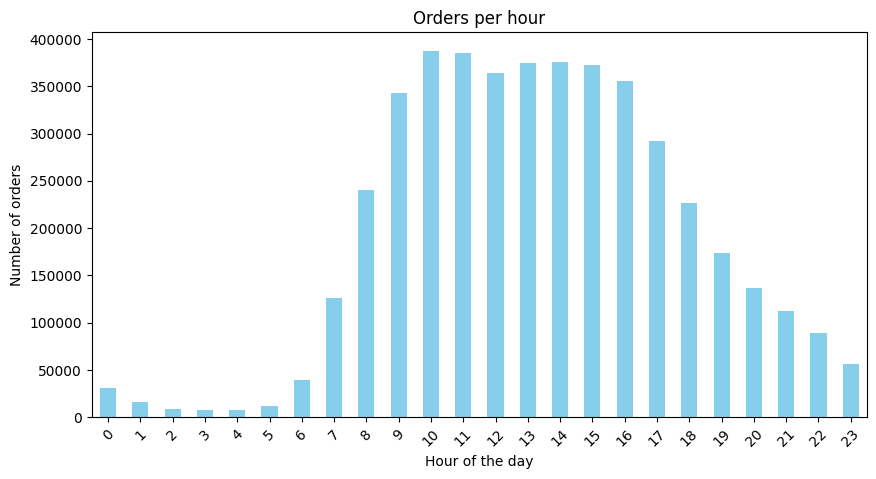

In [50]:
from matplotlib import pyplot as plt 
orders_per_hour = df ["order_hour_of_day"].value_counts().sort_index()
# Crenado las graficas
plt.figure(figsize=(10,5))
orders_per_hour.plot(kind="bar", color="skyblue")
# Colocandole titulos y etiquetas
plt.title("Orders per hour")
plt.xlabel("Hour of the day")
plt.ylabel("Number of orders")
plt.xticks(rotation=45)

plt.show()

Se puede apreciar a las 10 de la mañana, seguido de las 11, se realiza el mayor numero de ordenes hasta las 16 hrs, en donde comienza un decremento de estas.

### [A3] ¿Qué día de la semana compran víveres las personas?

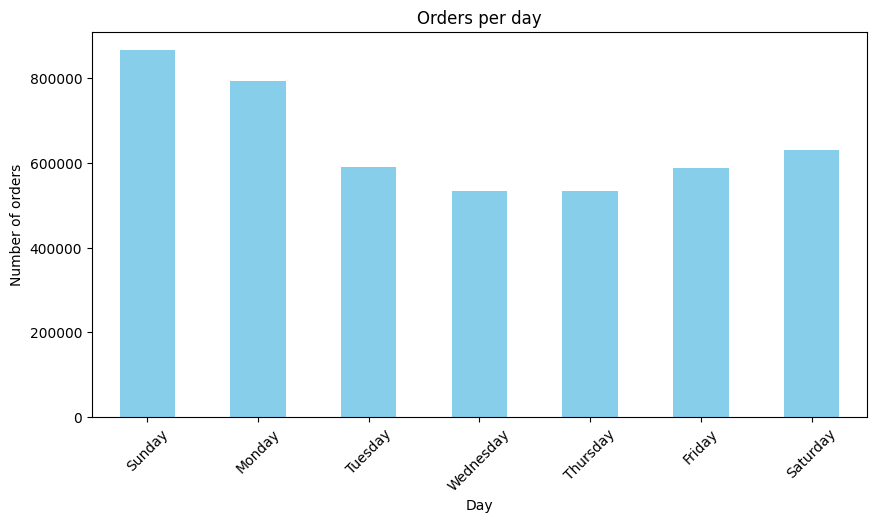

In [51]:
from matplotlib import pyplot as plt 
orders_per_day = df["order_dow"].value_counts().sort_index()
# Crenado las graficas
plt.figure(figsize=(10,5))
orders_per_day.plot(kind="bar", color="skyblue")
plt.xticks(ticks=range(7), labels=["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"], rotation=45)
# Colocandole titulos y etiquetas
plt.title("Orders per day")
plt.xlabel("Day")
plt.ylabel("Number of orders")
plt.xticks(rotation=45)

plt.show()

En la grafica anterior se puede apreciar que las personas compran viveres todos los dias de la semana, teniendo un valor mayor el domingo, seguido del lunes

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

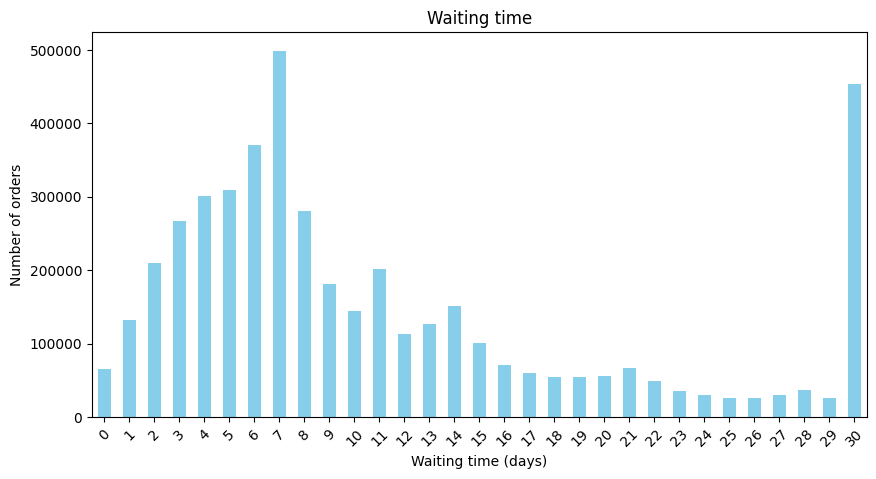

In [78]:
from matplotlib import pyplot as plt 
wait_time = df["days_since_prior_order"].value_counts().sort_index()
# Crenado las graficas
plt.figure(figsize=(10,5))
wait_time.plot(kind="bar", color="skyblue")
# Colocandole titulos y etiquetas
plt.title("Waiting time")
plt.xlabel("Waiting time (days)")
plt.ylabel("Number of orders")
plt.xticks(rotation=45)

plt.show()

Se puede ob servar que la mayoria de personas esperan 7 dias para realizar nuevamente otro pedido, lo anterior podria estar relacionado con el dia domingo de la semana, por otra parte, el dia 30 procede al 7, dicho valor podria relacionarce al fin de mes, donde las personas podrian estar prefiriendo realizar sus compras de viveres por pagos de salarios, por dar un ejemplo.

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

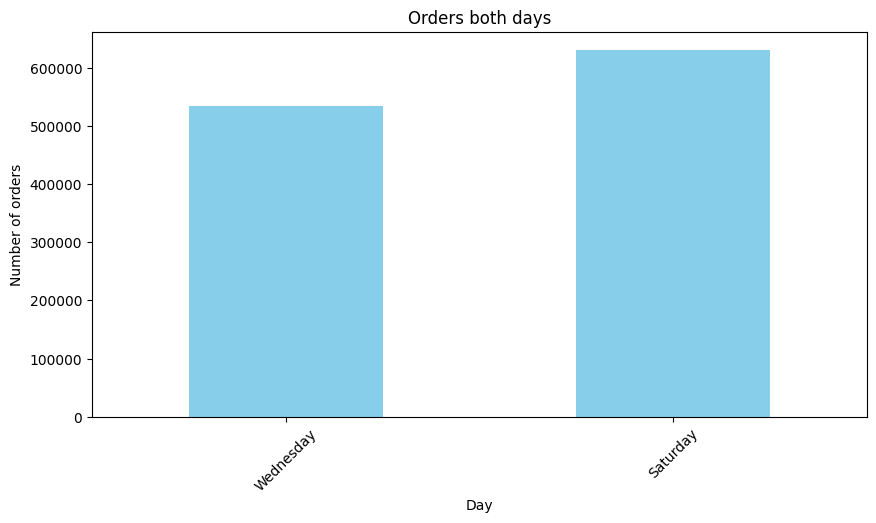

In [53]:
from matplotlib import pyplot as plt 
orders_per_day = df["order_dow"].value_counts().sort_index()
orders_filtered = orders_per_day.loc[[3, 6]]

# Crenado las graficas
plt.figure(figsize=(10,5))
orders_filtered.plot(kind="bar", color="skyblue")
plt.xticks(ticks=range(2), labels=[ "Wednesday", "Saturday"], rotation=45)
# Colocandole titulos y etiquetas
plt.title("Orders both days")
plt.xlabel("Day")
plt.ylabel("Number of orders")
plt.xticks(rotation=45)

plt.show()

No se encuentran grandes diferencias entre el miercoles y el sabado con respecto a la compra de viveres, siendo el sabado un dia de compras mayor que el miercoles.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

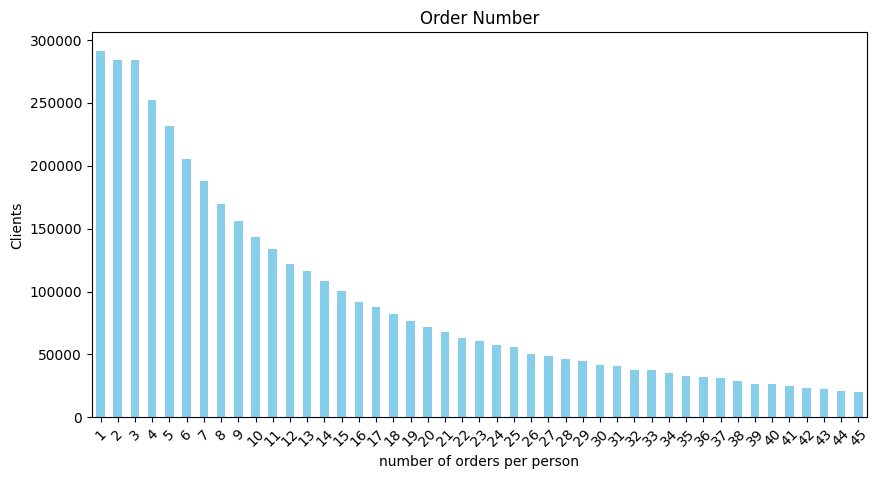

In [82]:
import matplotlib.pyplot as plt 
quantity = df["order_number"].value_counts().sort_index()
plt.figure(figsize=(10,5))
quantity.head(45).plot(kind="bar", color="skyblue")
# Ajustar las etiquetas del eje X
plt.xticks(rotation=45)  
# Agregar título y etiquetas
plt.title("Order Number")
plt.xlabel("number of orders per person")
plt.ylabel("Clients")

# Mostrar la gráfica
plt.show()

Se puede ver una distribucion de datos descendente, donde la mayoria de clientes realizan 1 orden unicamente.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [55]:
products_filtered = df[df["product_name"] != "Unknown"]
products_ = products_filtered.groupby("product_name")["product_id"].count()
products_20=products_.nlargest(20)
print(products_20)


product_name
Banana                      66050
Bag of Organic Bananas      53297
Organic Strawberries        37039
Organic Baby Spinach        33971
Organic Hass Avocado        29773
Organic Avocado             24689
Large Lemon                 21495
Strawberries                20018
Limes                       19690
Organic Whole Milk          19600
Organic Raspberries         19197
Organic Yellow Onion        15898
Organic Garlic              15292
Organic Zucchini            14584
Organic Blueberries         13879
Cucumber Kirby              13675
Organic Fuji Apple          12544
Organic Lemon               12232
Apple Honeycrisp Organic    11993
Organic Grape Tomatoes      11781
Name: product_id, dtype: int64


In [56]:
new_names = {
    "#2 Coffee Filters": "Coffee Filters",
    "#2 Cone White Coffee Filters": "Cone White Coffee Filters",
    "#2 Mechanical Pencils": "Mechanical Pencils",
    "#4 Natural Brown Coffee Filters": "Natural Brown Coffee Filters",
    "& Go! Hazelnut Spread + Pretzel Sticks": "Go! Hazelnut Spread + Pretzel Sticks",
    "'Swingtop' Premium Lager": "Swingtop Premium Lager",
    "(70% Juice!) Mountain Raspberry Juice Squeeze": "Mountain Raspberry Juice Squeeze",
    "+Energy Black Cherry Vegetable & Fruit Juice": "Energy Black Cherry Vegetable & Fruit Juice",
    '.5\\" Waterproof Tape': "Waterproof Tape",
    "0 Calorie Acai Raspberry Water Beverage": "Calorie Acai Raspberry Water Beverage",
    "0 Calorie Fuji Apple Pear Water Beverage": "Calorie Fuji Apple Pear Water Beverage",
    "0% Fat Black Cherry Greek Yogurt y": "0% Fat Black Cherry Greek Yogurt",
    "0% Fat Blueberry Greek Yogurt": "0% Fat Blueberry Greek Yogurt",
    "0% Fat Free Organic Milk": "0% Fat Free Organic Milk",
    "0% Fat Greek Yogurt Black Cherry on the Bottom": "0% Fat Greek Yogurt Black Cherry",
    "0% Fat Greek Yogurt Vanilla": "0% Fat Greek Yogurt Vanilla",
    "0% Fat Organic Greek Vanilla Yogurt": "0% Fat Organic Greek Vanilla Yogurt",
    "0% Fat Peach Greek Yogurt": "0% Fat Peach Greek Yogurt",
    "0% Fat Strawberry Greek Yogurt": "0% Fat Strawberry Greek Yogurt",
    "0 Calorie Strawberry Dragonfruit Water Beverage": "Calorie Strawberry Dragonfruit Water Beverage"
}


In [57]:
for name in products_20.index:
    if "Tape" in name:  
        print(repr(name)) 

In [59]:
products_20= products_20.rename(index=new_names)
print(products_20.index)

Index(['Banana', 'Bag of Organic Bananas', 'Organic Strawberries',
       'Organic Baby Spinach', 'Organic Hass Avocado', 'Organic Avocado',
       'Large Lemon', 'Strawberries', 'Limes', 'Organic Whole Milk',
       'Organic Raspberries', 'Organic Yellow Onion', 'Organic Garlic',
       'Organic Zucchini', 'Organic Blueberries', 'Cucumber Kirby',
       'Organic Fuji Apple', 'Organic Lemon', 'Apple Honeycrisp Organic',
       'Organic Grape Tomatoes'],
      dtype='object', name='product_name')


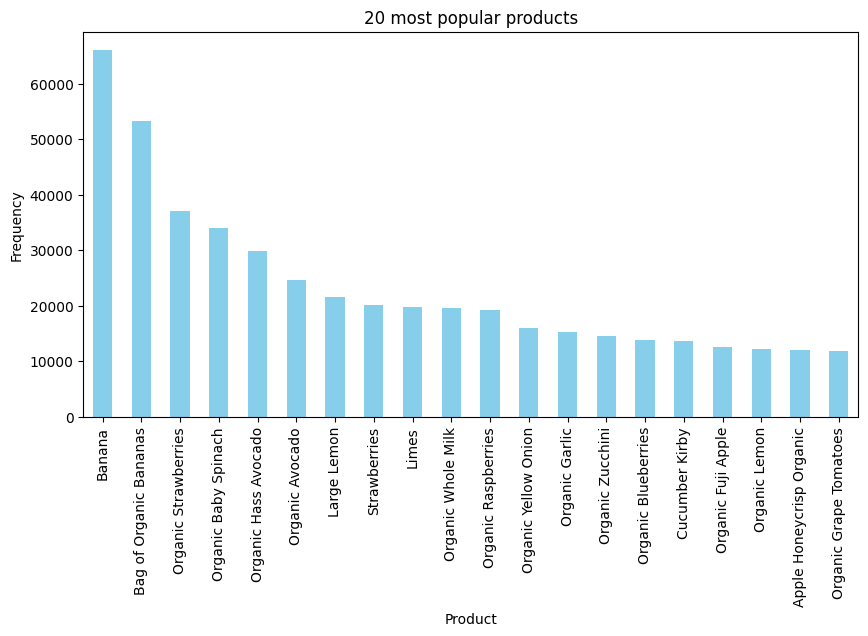

In [60]:
from matplotlib import pyplot as plt 
products_filtered = df[df["product_name"] != "Unknown"]
products_ = products_filtered.groupby("product_name")["product_id"].count()
products_20 = products_.nlargest(20)
products_20 = products_20.rename(index=new_names)  
plt.figure(figsize=(10,5))
products_20.plot(kind="bar", color="skyblue")
plt.title("20 most popular products")
plt.xlabel("Product")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()

En la tabla anterior se pueden observar que la mayoria de productoas mas vendidos se encuentran las frutas como es la banana, fresas, espinacas entre otros.

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [61]:
articles_per_order = df.groupby("order_id")["product_id"].count().sort_index()
print(articles_per_order)


order_id
4          13
9          15
11          5
19          3
20          8
           ..
3421034    17
3421053     9
3421071     5
3421077     4
3421079     1
Name: product_id, Length: 450022, dtype: int64


In [62]:
# Calcular el número de productos por pedido
articles_per_order = df.groupby("order_id")["product_id"].count()

# Contar cuántos pedidos hay para cada cantidad de productos
users_per_product_count = articles_per_order.value_counts().sort_index()

print(users_per_product_count)

product_id
1      21892
2      26385
3      29129
4      31154
5      31986
       ...  
98         1
104        1
108        1
115        1
127        1
Name: count, Length: 90, dtype: int64


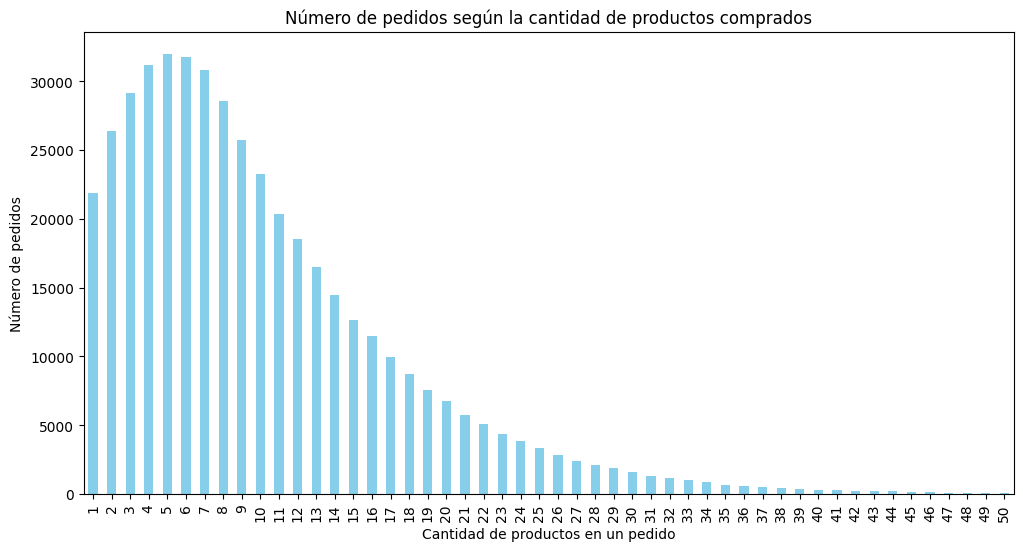

In [63]:
import matplotlib.pyplot as plt

# Crear la figura
plt.figure(figsize=(12,6))

# Graficar la cantidad de pedidos por número de productos
users_per_product_count.head(50).plot(kind="bar", color="skyblue")

# Títulos y etiquetas
plt.title("Número de pedidos según la cantidad de productos comprados")
plt.xlabel("Cantidad de productos en un pedido")
plt.ylabel("Número de pedidos")
plt.xticks(rotation=90)  # Rota las etiquetas para mejor visualización

# Mostrar gráfico
plt.show()

La mayoria de personas agrega 5 productos a su carrito, a partir del producto 7 inicia a decrecer dicha cifra.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [66]:
top_20_products_record=  df[df["reordered"] == 1]

In [67]:
top_20_products_record_grouped = top_20_products_record.groupby("product_name")["reordered"].sum().reset_index()
top_20_products_record_grouped = top_20_products_record_grouped.sort_values(by="reordered", ascending=False)

print(top_20_products_record_grouped.head(50))

                               product_name  reordered
2506                                 Banana      55763
2362                 Bag of Organic Bananas      44450
22964                  Organic Strawberries      28639
20476                  Organic Baby Spinach      26233
21637                  Organic Hass Avocado      23629
20447                       Organic Avocado      18743
23409                    Organic Whole Milk      16251
15928                           Large Lemon      15044
22501                   Organic Raspberries      14748
30881                          Strawberries      13945
16647                                 Limes      13327
23480                  Organic Yellow Onion      11145
21404                        Organic Garlic      10411
23511                      Organic Zucchini      10076
8309                         Cucumber Kirby       9538
21388                    Organic Fuji Apple       8989
1785               Apple Honeycrisp Organic       8836
20609     

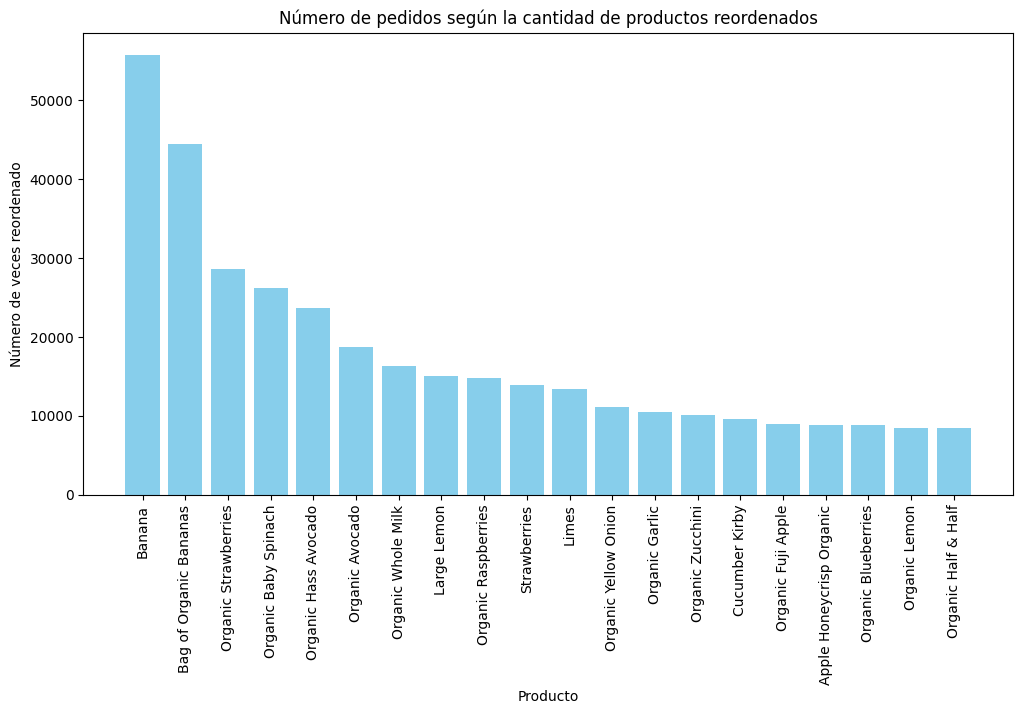

In [68]:
import matplotlib.pyplot as plt
# Crear la figura
plt.figure(figsize=(12,6))
# Seleccionar los 20 productos más reordenados
top_20 = top_20_products_record_grouped.head(20)

# Graficar
plt.bar(top_20["product_name"], top_20["reordered"], color="skyblue")

# Títulos y etiquetas
plt.title("Número de pedidos según la cantidad de productos reordenados")
plt.xlabel("Producto")
plt.ylabel("Número de veces reordenado")

# Rotar etiquetas del eje X
plt.xticks(rotation=90)

# Mostrar gráfico
plt.show()

La mayoria de personas reordena frutas, lo anterior coincide con que las frutas sen los articulos de mayor venta.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [69]:
order_count = top_20_products_record.groupby("product_name")["order_id"].nunique().reset_index()

# Ordenar de mayor a menor
order_count = order_count.sort_values(by="order_id", ascending=False)

# Calcular el total de pedidos
total_orders = order_count["order_id"].sum()
total_filas = len(order_count)

# Calcular el porcentaje de pedidos en los que aparece cada producto
order_count["percentage"] = (order_count["order_id"]*100) / total_orders

# Mostrar los primeros resultados
print(order_count.head(20))

                   product_name  order_id  percentage
2506                     Banana     55763    2.080631
2362     Bag of Organic Bananas     44450    1.658520
22964      Organic Strawberries     28639    1.068579
20476      Organic Baby Spinach     26233    0.978806
21637      Organic Hass Avocado     23629    0.881646
20447           Organic Avocado     18743    0.699339
23409        Organic Whole Milk     16251    0.606358
15928               Large Lemon     15044    0.561322
22501       Organic Raspberries     14748    0.550278
30881              Strawberries     13945    0.520316
16647                     Limes     13327    0.497257
23480      Organic Yellow Onion     11145    0.415843
21404            Organic Garlic     10411    0.388456
23511          Organic Zucchini     10076    0.375956
8309             Cucumber Kirby      9538    0.355882
21388        Organic Fuji Apple      8989    0.335398
1785   Apple Honeycrisp Organic      8836    0.329689
20609       Organic Blueberr

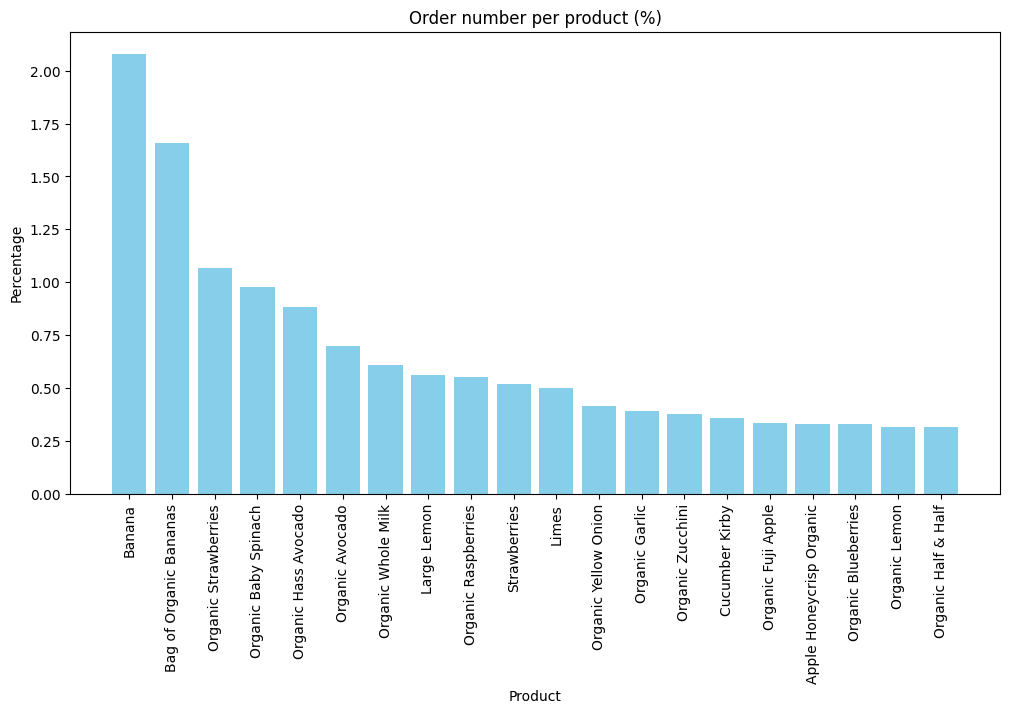

In [79]:
import matplotlib.pyplot as plt

# Crear la figura
plt.figure(figsize=(12,6))

# Graficar la cantidad de pedidos por producto
plt.bar(order_count["product_name"].head(20), order_count["percentage"].head(20), color="skyblue")

# Títulos y etiquetas
plt.title("Order number per product (%)")
plt.xlabel("Product")
plt.ylabel("Percentage")
plt.xticks(rotation=90) 

# Mostrar gráfico
plt.show()

La bananas se ordenan un 2% siendo este dato el mayor seguido de las bananas organicas,los demas productos se ordenan en una proporcion menor al 1%

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [80]:
# Filtrar solo los productos reordenados antes de agrupar
reordered_products = df[df["reordered"] == 1]

# Contar cuántos productos hay por cada orden
total_products_by_order = df.groupby("order_id")["product_id"].count()

# Contar cuántos productos reordenados hay por cada orden
products_reordered_by_order = reordered_products.groupby("order_id")["product_id"].count()

# Calcular la proporción de productos reordenados en cada orden
proportion_reordered = products_reordered_by_order / total_products_by_order


print(proportion_reordered.sort_values(ascending= False))

order_id
142        1.0
3421053    1.0
191        1.0
3421034    1.0
11         1.0
          ... 
3420807    NaN
3420827    NaN
3420936    NaN
3421077    NaN
3421079    NaN
Name: product_id, Length: 450022, dtype: float64


Los clientes piden el 1% de cada uno de sus productos nuevamente.

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [81]:
first_product  = df[df["add_to_cart_order"] == 1]
first_product_ = first_product.groupby("product_name")["order_id"].count()  

print(first_product_.sort_values(ascending= False).head(20))


product_name
Banana                         15562
Bag of Organic Bananas         11026
Organic Whole Milk              4363
Organic Strawberries            3946
Organic Hass Avocado            3390
Organic Baby Spinach            3336
Organic Avocado                 3044
Spring Water                    2336
Strawberries                    2308
Organic Raspberries             2024
Sparkling Water Grapefruit      1914
Organic Half & Half             1797
Large Lemon                     1737
Soda                            1733
Organic Reduced Fat Milk        1397
Limes                           1370
Hass Avocados                   1340
Organic Reduced Fat 2% Milk     1310
Half & Half                     1309
Raspberries                     1246
Name: order_id, dtype: int64


Las personas se surten primero de frutas y verdudas a excepcion de la soda, lo anterior coincide con los productos de mayor venta en el negocio.

### Conclusion general del proyecto:

En el análisis de ventas de Instacart, se observó que los productos más vendidos pertenecen principalmente a la categoría de frutas, verduras y productos orgánicos. Estos productos tienen una alta frecuencia de compra, con un pico cada 7 días, lo que sugiere un patrón de reabastecimiento semanal. Sin embargo, también se identificó un grupo de clientes que realiza compras aproximadamente cada 30 días, lo cual podría estar relacionado con los ciclos de pago de salarios y la reposición de víveres.

Además, se encontró que la mayoría de los usuarios realiza entre 1 y 3 compras, mientras que a partir de la cuarta compra se observa una disminución en la recurrencia de pedidos. Esto indica que muchos clientes prueban el servicio unas pocas veces antes de reducir su frecuencia de uso o discontinuarlo.

Por último, dentro del conjunto de productos más vendidos, las bananas destacan como el artículo con mayor demanda, representando aproximadamente el 2% de las ventas totales. Esto confirma su popularidad y su presencia constante en las compras de los consumidores.